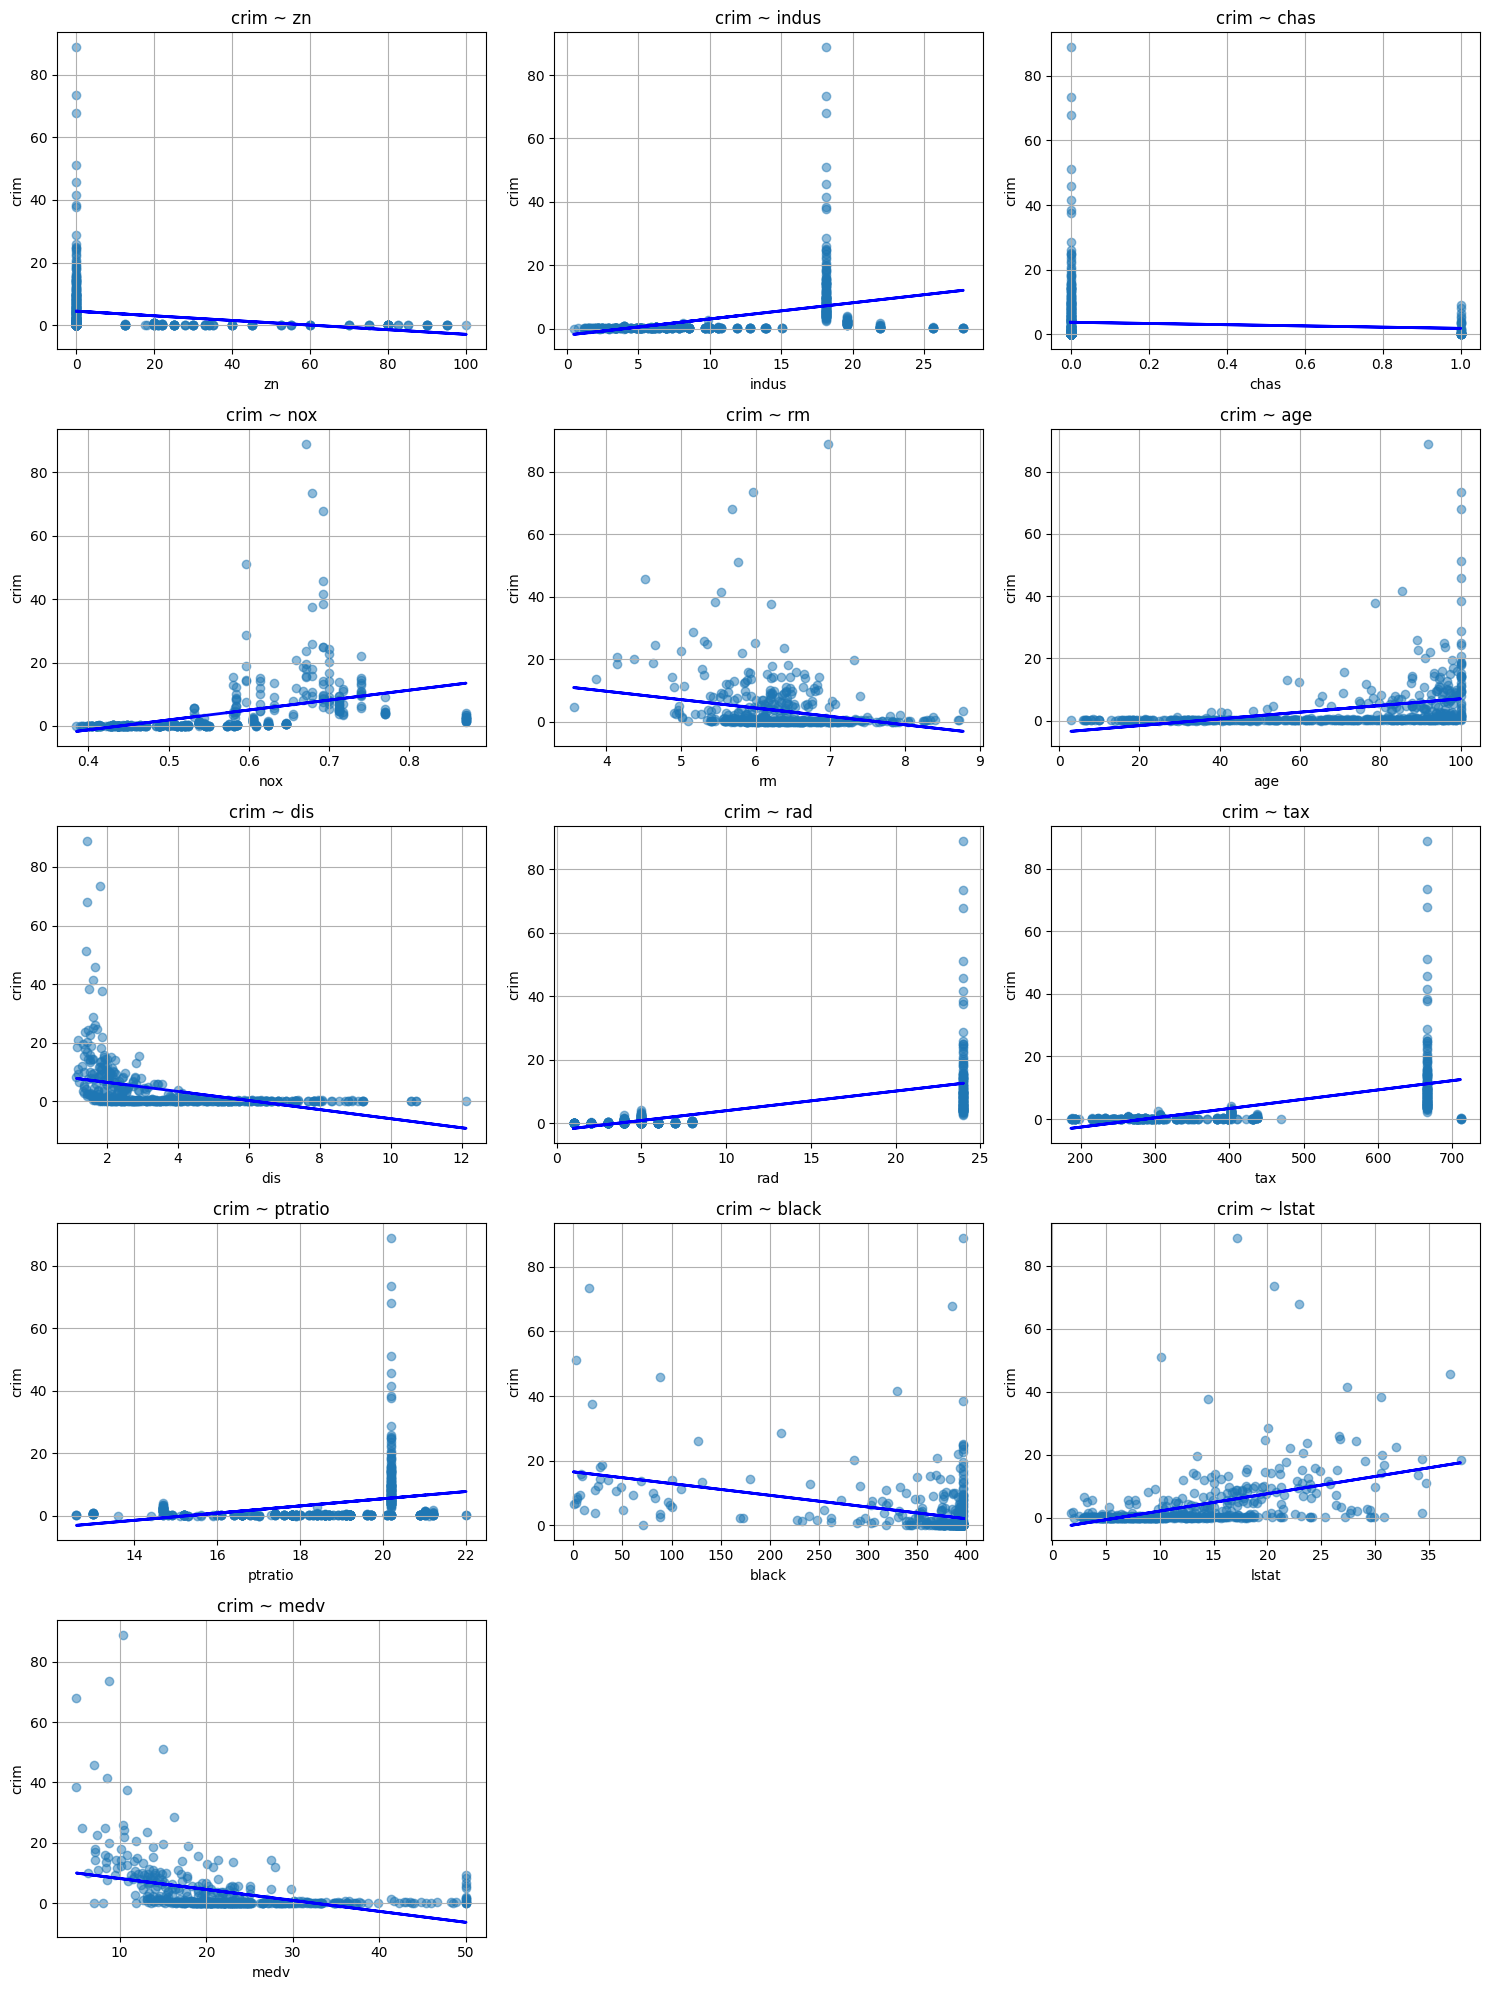

Summary of Simple vs. Multiple Regression Coefficients and P-Values:
   Predictor  Simple Coefficient  Simple PValue  Multiple Coefficient  \
0         zn           -0.073935   5.506472e-06              0.044855   
1      indus            0.509776   1.450349e-21             -0.063855   
2       chas           -1.892777   2.094345e-01             -0.749134   
3        nox           31.248531   3.751739e-23            -10.313535   
4         rm           -2.684051   6.346703e-07              0.430131   
5        age            0.107786   2.854869e-16              0.001452   
6        dis           -1.550902   8.519949e-19             -0.987176   
7        rad            0.617911   2.693844e-56              0.588209   
8        tax            0.029742   2.357127e-47             -0.003780   
9    ptratio            1.151983   2.942922e-11             -0.271081   
10     black           -0.036280   2.487274e-19             -0.007538   
11     lstat            0.548805   2.654277e-27        

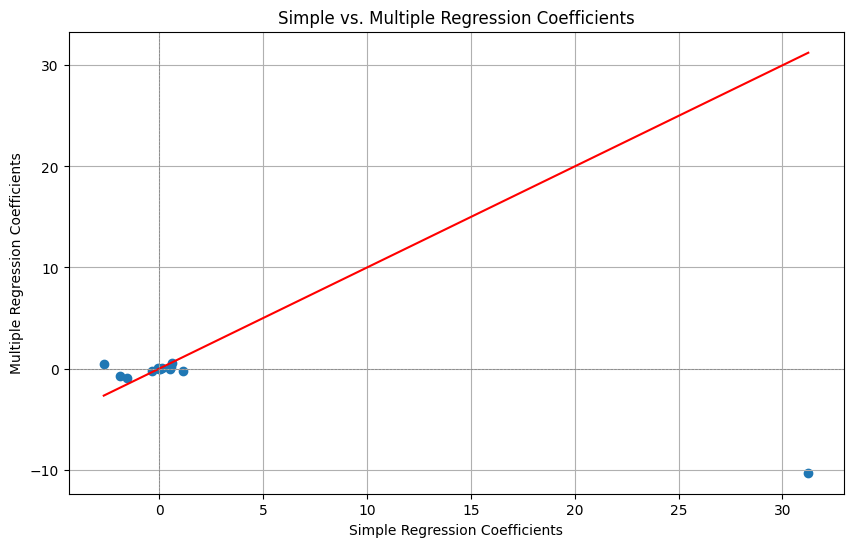

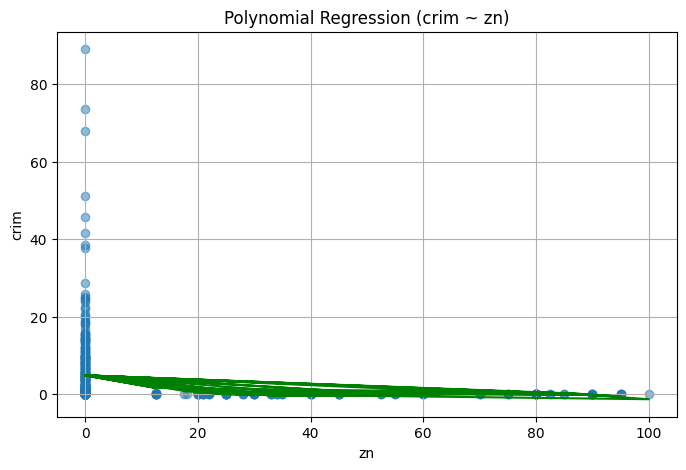

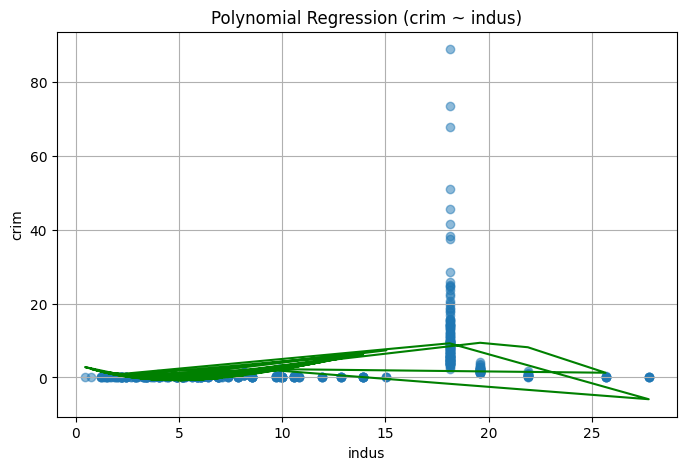

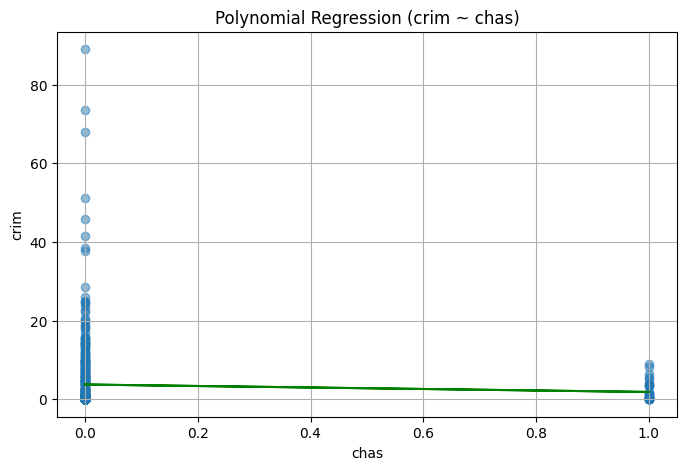

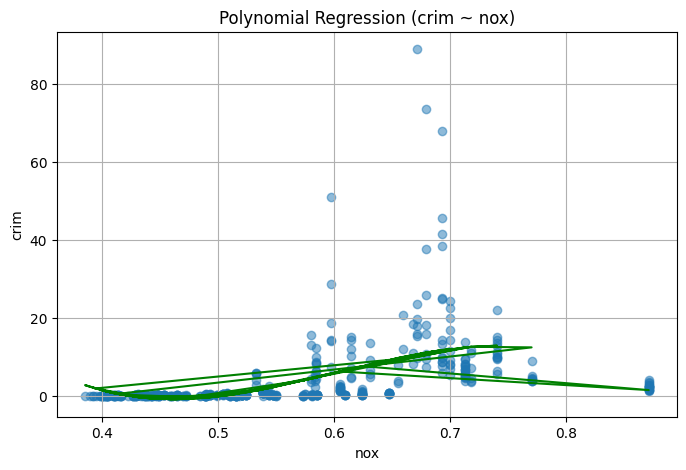

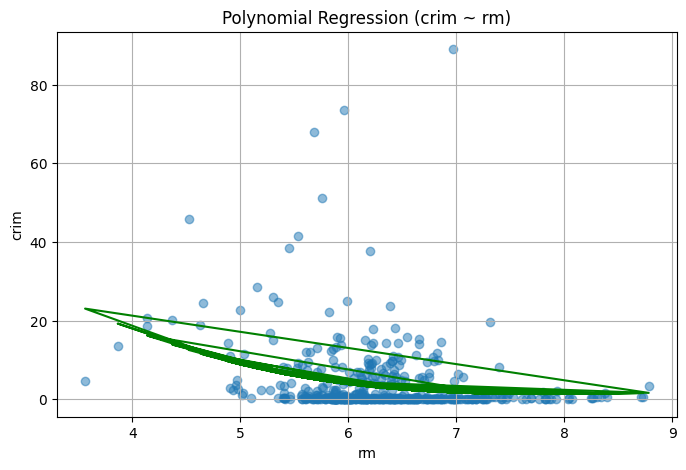

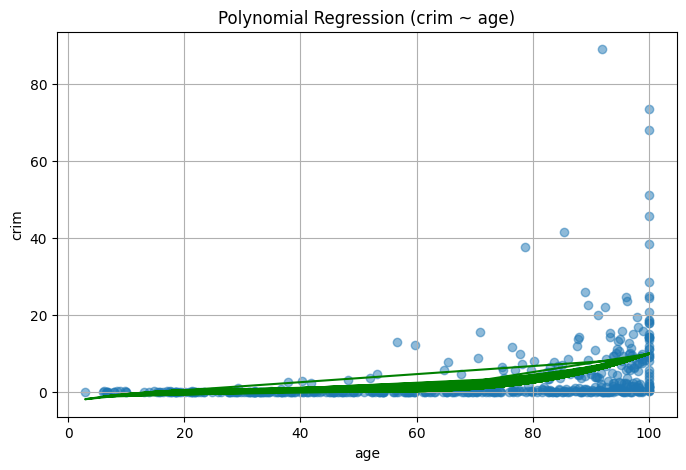

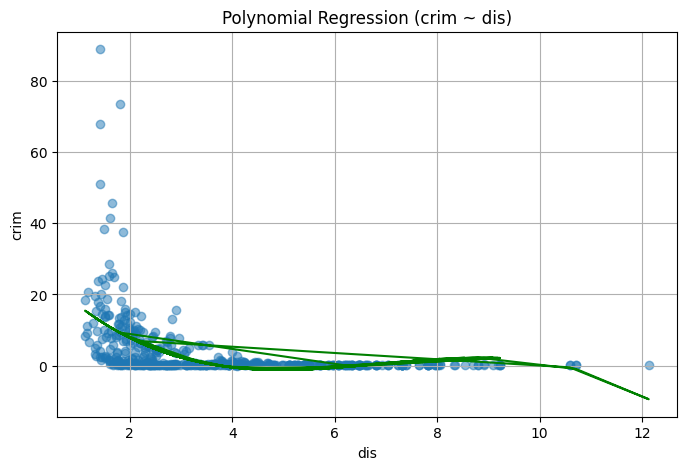

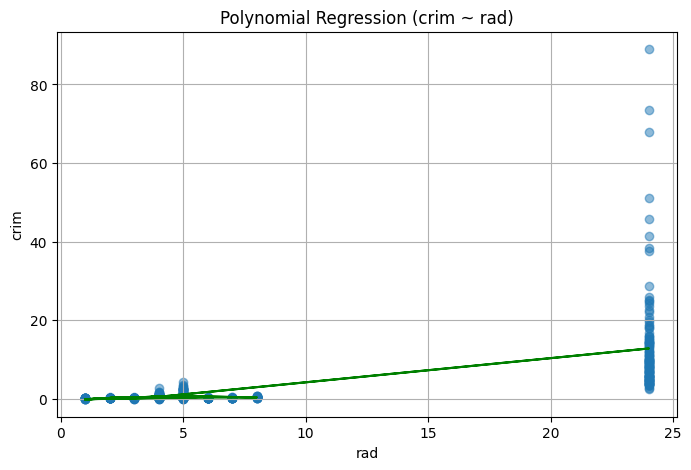

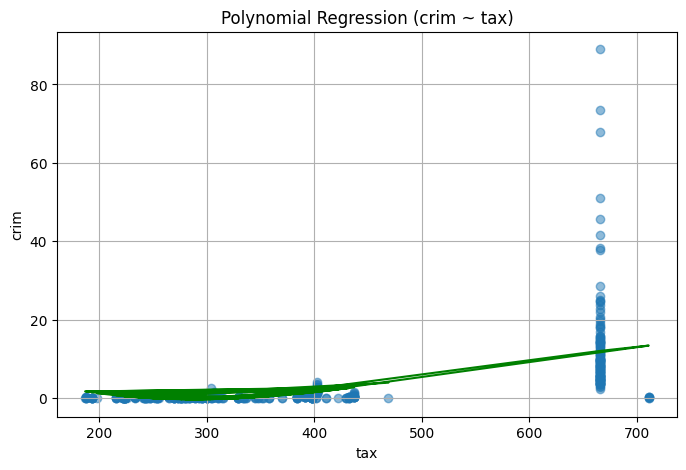

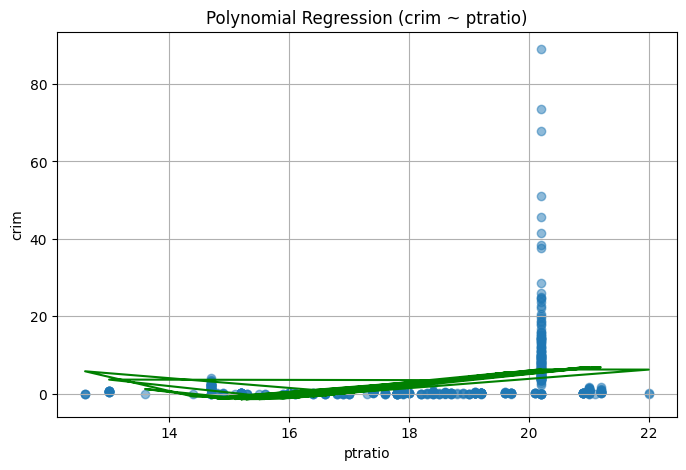

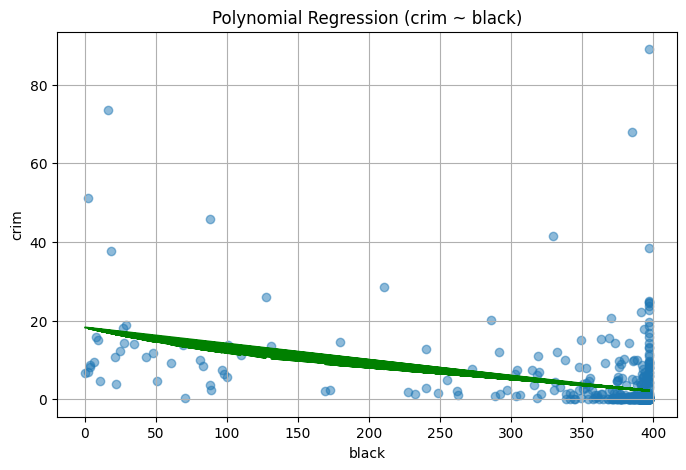

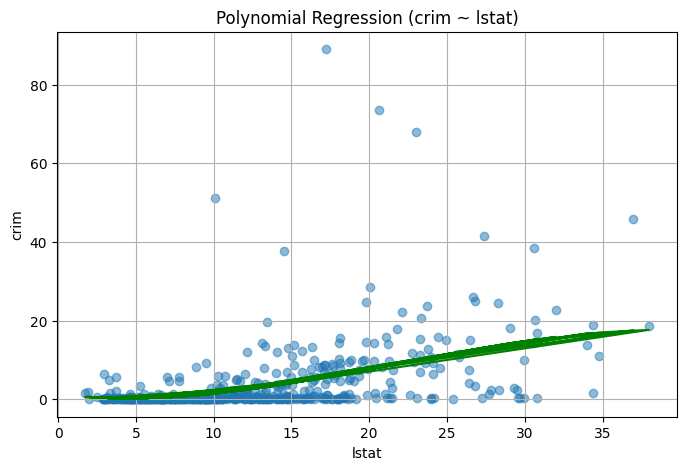

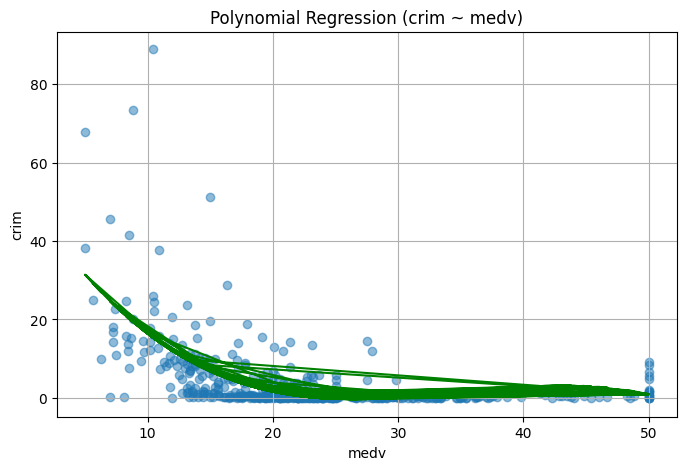

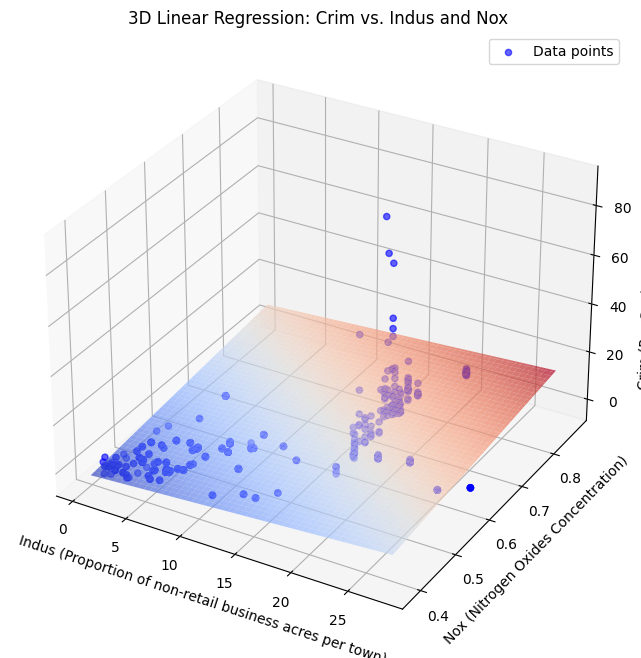

主要針對 Boston 資料集，探索犯罪率（crim）與其他變量之間的關聯。共完成了四個步驟，包括單變量回歸、多變量回歸、比較單變量與多變量的結果，以及檢查非線性關係。
(a) 單變量回歸：
每個變量（如 zn, indus, nox 等）單獨進行線性回歸，分析它們與犯罪率 (crim) 的關聯。
使用 statsmodels 模組建立簡單的線性回歸模型，並記錄每個變量的回歸係數與 p 值。p 值小於 0.05 表明這些變量與犯罪率之間存在顯著關聯。
為了更直觀展示結果，為每個變量繪製了散佈圖和對應的回歸線，顯示變量與犯罪率之間的正負關係。例如，indus 與犯罪率呈正相關，而 zn 與犯罪率呈負相關。
(b) 多變量回歸：
將所有變量一起納入模型，進行多變量回歸。
發現一些在單變量回歸中顯著的變量，在多變量回歸中可能不再顯著，這是因為多變量回歸考慮了變量之間的相互影響。
記錄每個變量的回歸係數和 p 值，並對比它們在多變量回歸中的結果。
(c) 單變量與多變量回歸的比較：
將每個變量在單變量回歸中的係數與多變量回歸中的係數進行比較，並繪製了散佈圖展示兩者之間的差異。
發現一些變量（如 nox, tax）在單變量和多變量回歸中都有相似的影響，但有些變量的影響則大不相同。
(d) 非線性關係檢查：
檢查每個變量與犯罪率之間是否存在非線性關係。對每個變量進行了三次多項式回歸（包括 X, X² 和 X³），並視覺化了回歸曲線。
在某些情況下，多項式模型能夠更好地擬合資料，表明一些變量可能與犯罪率呈現非線性關係。
(e) 3D 線性回歸：
用兩個變量（indus 和 nox）進行了 3D 線性回歸，展示它們如何共同影響犯罪率。
繪製了 3D 散佈圖和回歸平面，直觀展示了兩個變量對犯罪率的聯合影響。


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the dataset
boston_data = pd.read_csv('/content/Boston.csv')

# (a) Simple linear regression for each predictor
predictors = boston_data.columns.drop('crim')  # All predictors except 'crim'
results = []

# Set up the figure for simple linear regression plots
num_predictors = len(predictors)
n_cols = 3
n_rows = (num_predictors + n_cols - 1) // n_cols  # Calculate required rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, predictor in enumerate(predictors):
    X = sm.add_constant(boston_data[[predictor]])  # Add constant for intercept
    y = boston_data['crim']

    model = sm.OLS(y, X).fit()  # Fit the simple linear regression model
    p_value = model.pvalues.iloc[1]  # p-value for the predictor
    coef = model.params.iloc[1]  # Coefficient for the predictor

    results.append({'Predictor': predictor, 'Simple Coefficient': coef, 'Simple PValue': p_value})

    # Scatter plot and regression line
    axes[i].scatter(boston_data[predictor], y, alpha=0.5)
    axes[i].plot(boston_data[predictor], model.predict(X), color='blue', linewidth=2)
    axes[i].set_title(f"crim ~ {predictor}")
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('crim')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# (b) Multiple regression using all predictors
X_multi = sm.add_constant(boston_data[predictors])  # Add all predictors with constant
y_multi = boston_data['crim']
multi_model = sm.OLS(y_multi, X_multi).fit()  # Fit the multiple regression model

# Extract coefficients and p-values from multiple regression
multi_coefs = multi_model.params[1:]  # Exclude intercept
multi_pvalues = multi_model.pvalues[1:]  # Exclude intercept

# Add multiple regression results to the DataFrame
results_df['Multiple Coefficient'] = multi_coefs.values
results_df['Multiple PValue'] = multi_pvalues.values

# Display the summary table
print("Summary of Simple vs. Multiple Regression Coefficients and P-Values:")
print(results_df)

# (c) Compare coefficients from simple vs multiple regression
simple_coefs = results_df['Simple Coefficient']
multiple_coefs = results_df['Multiple Coefficient']

# Plot comparison
plt.figure(figsize=(10, 6))
plt.scatter(simple_coefs, multiple_coefs)
plt.plot([min(simple_coefs), max(simple_coefs)], [min(simple_coefs), max(simple_coefs)], color='red')
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Simple vs. Multiple Regression Coefficients")
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

# (d) Non-linear relationships (polynomial regression)
poly_results = []

for predictor in predictors:
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(boston_data[[predictor]])
    X_poly = sm.add_constant(X_poly)

    poly_model = sm.OLS(y, X_poly).fit()
    poly_results.append(poly_model.summary())

    # Displaying non-linear fit plots
    plt.figure(figsize=(8, 5))
    plt.scatter(boston_data[predictor], y, alpha=0.5)
    plt.plot(boston_data[predictor], poly_model.predict(X_poly), color='green')
    plt.title(f"Polynomial Regression (crim ~ {predictor})")
    plt.xlabel(predictor)
    plt.ylabel('crim')
    plt.grid(True)
    plt.show()

# (e) 3D Linear regression using two predictors
# For illustration, let's use 'indus' and 'nox' to predict 'crim'
X_3d = boston_data[['indus', 'nox']]
y_3d = boston_data['crim']

# Add constant for intercept
X_3d = sm.add_constant(X_3d)

# Fit the linear regression model
model_3d = sm.OLS(y_3d, X_3d).fit()

# Get the model's coefficients
intercept, coef_indus, coef_nox = model_3d.params

# Create meshgrid for plotting regression plane
indus_vals = np.linspace(X_3d['indus'].min(), X_3d['indus'].max(), 100)
nox_vals = np.linspace(X_3d['nox'].min(), X_3d['nox'].max(), 100)
indus_vals, nox_vals = np.meshgrid(indus_vals, nox_vals)
crim_vals = intercept + coef_indus * indus_vals + coef_nox * nox_vals

# Plotting the 3D scatter plot and regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(boston_data['indus'], boston_data['nox'], boston_data['crim'], color='blue', alpha=0.6, label='Data points')

# Plot the regression plane
ax.plot_surface(indus_vals, nox_vals, crim_vals, cmap=cm.coolwarm, alpha=0.7)

# Set labels and title
ax.set_xlabel('Indus (Proportion of non-retail business acres per town)')
ax.set_ylabel('Nox (Nitrogen Oxides Concentration)')
ax.set_zlabel('Crim (Per Capita Crime Rate)')
ax.set_title('3D Linear Regression: Crim vs. Indus and Nox')

# Show legend and plot
ax.legend()
plt.show()

# Save results to CSV file
results_df.to_csv('regression_summary.csv', index=False)


print("主要針對 Boston 資料集，探索犯罪率（crim）與其他變量之間的關聯。共完成了四個步驟，包括單變量回歸、多變量回歸、比較單變量與多變量的結果，以及檢查非線性關係。")
print("(a) 單變量回歸：")

print("每個變量（如 zn, indus, nox 等）單獨進行線性回歸，分析它們與犯罪率 (crim) 的關聯。")
print("使用 statsmodels 模組建立簡單的線性回歸模型，並記錄每個變量的回歸係數與 p 值。p 值小於 0.05 表明這些變量與犯罪率之間存在顯著關聯。")
print("為了更直觀展示結果，為每個變量繪製了散佈圖和對應的回歸線，顯示變量與犯罪率之間的正負關係。例如，indus 與犯罪率呈正相關，而 zn 與犯罪率呈負相關。")
print("(b) 多變量回歸：")

print("將所有變量一起納入模型，進行多變量回歸。")
print("發現一些在單變量回歸中顯著的變量，在多變量回歸中可能不再顯著，這是因為多變量回歸考慮了變量之間的相互影響。")
print("記錄每個變量的回歸係數和 p 值，並對比它們在多變量回歸中的結果。")
print("(c) 單變量與多變量回歸的比較：")

print("將每個變量在單變量回歸中的係數與多變量回歸中的係數進行比較，並繪製了散佈圖展示兩者之間的差異。")
print("發現一些變量（如 nox, tax）在單變量和多變量回歸中都有相似的影響，但有些變量的影響則大不相同。")
print("(d) 非線性關係檢查：")

print("檢查每個變量與犯罪率之間是否存在非線性關係。對每個變量進行了三次多項式回歸（包括 X, X² 和 X³），並視覺化了回歸曲線。")
print("在某些情況下，多項式模型能夠更好地擬合資料，表明一些變量可能與犯罪率呈現非線性關係。")
print("(e) 3D 線性回歸：")

print("用兩個變量（indus 和 nox）進行了 3D 線性回歸，展示它們如何共同影響犯罪率。")
print("繪製了 3D 散佈圖和回歸平面，直觀展示了兩個變量對犯罪率的聯合影響。")